In [44]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict


//define state
//state graph
//add nodes to grapha
//edges to graph
//compile the graph
//execute the graph

In [45]:
# define state
class BMIState(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float     # body mass index
    catogory: str  # BMI category

In [46]:
# define a simple state graph
graph=StateGraph(BMIState)

In [47]:
def calculate_bmi(state: BMIState) -> BMIState:
    height = state['height']
    weight = state['weight']
    bmi = weight / (height ** 2)
    state['bmi'] =round(bmi,2)
    return state

In [48]:
def label_bmi_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'
    state['catogory'] = category
    return state

In [49]:
# add nodes to the graph
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("label_bmi_category",label_bmi_category)

In [50]:
# add edges to the graph
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi","label_bmi_category")
graph.add_edge("label_bmi_category",END)

In [51]:
# compile the graph
workflow=graph.compile()

In [57]:
# execute the workflow
initial_state= {'height': 1.75, 'weight': 80}


In [58]:
final_state=workflow.invoke(initial_state)


In [59]:
print(final_state)

{'height': 1.75, 'weight': 80, 'bmi': 26.12, 'catogory': 'Overweight'}


In [55]:
from IPython.display import Image

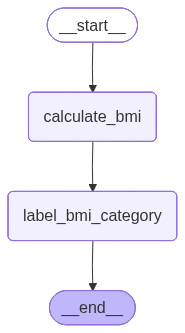

In [56]:
Image(workflow.get_graph().draw_mermaid_png())